# Correlative Measures on Spike Trains

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import quantities as pq
from elephant.spike_train_generation import StationaryPoissonProcess, NonStationaryPoissonProcess
from elephant.conversion import BinnedSpikeTrain
from elephant.spike_train_correlation import (
    covariance,
    correlation_coefficient,
    cross_correlation_histogram,
)
from viziphant.spike_train_correlation import (
    plot_cross_correlation_histogram,
    plot_corrcoef,
)
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
from neo.core import AnalogSignal


class utils:
    def pulse_NonStationaryPoissonProcess(
        modulation_start,
        modulation_duration,
        modulation_amplitude,
        t_stop,
        base_rate=1 * pq.Hz,
    ):
        t = np.linspace(0 * pq.s, t_stop, int(t_stop.magnitude * 1000))
        rate_signal = np.zeros(len(t)) * pq.Hz + base_rate
        idx_start = np.argmin(np.abs(t - modulation_start))
        idx_stop = np.argmin(np.abs(t - (modulation_start + modulation_duration)))
        rate_signal[idx_start:idx_stop] += modulation_amplitude
        rate_signal = AnalogSignal(rate_signal, sampling_rate=1000 * pq.Hz)
        neuron = NonStationaryPoissonProcess(rate_signal)
        return neuron

## 1 Simulating Bursting Neurons with Non-Stationary Poisson Processes

| Code | Description |
|------------------------------------|------------------------------------|
| `neuron = utils.pulse_NonStationaryProcess()` | Simulate a neuron as a non-stationary Poisson process with a firing rate that changes over time |
| `neuron.rate_signal` | Access the time-varying `.rate_signal` of the simulated `neuron` |
| `neuron.rate_signal.times` | Access the time points of the simulated neurons’s `.rate_signal` |
| `ax1 = plt.subplot(2, 1, 1)` | Generate the 1st plot in a 2-by-1 subplot an assign the returned object to a variable `ax1` |
| `plt.subplot(2, 1, 2, sharex=ax1)` | Generate the 2nd plot in a 2-by-1 subplot and make it share the x-axis with `ax1` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Use
`utils.pulse_NonStationaryPoissonProcess()` to simulate a neuron that is
active for **1.5s** with a base firing-rate of **5 Hz** that is
modulated by a pulse which starts at of **0.7 s**, lasts **0.1 s** and
has an amplitude of **100 Hz**. Then, plot the neuron’s `.rate_signal`.

``` python
neuron = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=0.7 * pq.s,
    modulation_duration=0.1 * pq.s,
    modulation_amplitude=100 * pq.Hz,
    base_rate= 5* pq.Hz,
    t_stop=1.5 * pq.s,
)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.xlabel("Time [s]")
plt.ylabel("Modulation Amplitude [Hz]")
```

    Text(0, 0.5, 'Modulation Amplitude [Hz]')

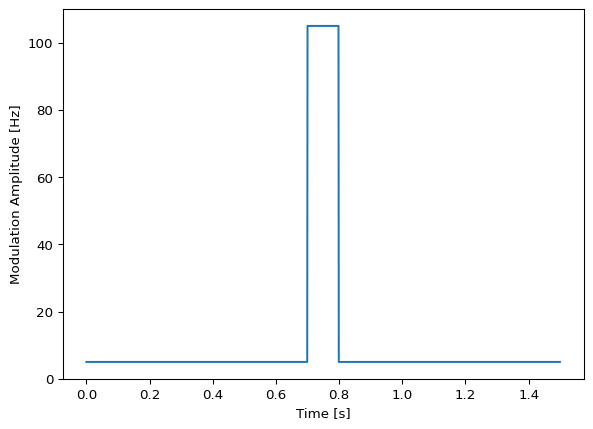

<span class="theorem-title">**Example 2**</span> Generate a spike train
from the simulated neuron and plot the neuron’s rate signal together
with an `eventplot` of the spike `.times`. Ensure that the subplots
apply the same scaling on the x-axis by using the `sharex` argument in
`plt.subplot()`.

``` python
st = neuron.generate_spiketrain()
ax1 = plt.subplot(2, 1, 1)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.ylabel("Modulation Amplitude [Hz]")
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.eventplot(st.times)
plt.xlabel("Time [s]")
plt.yticks([])
```

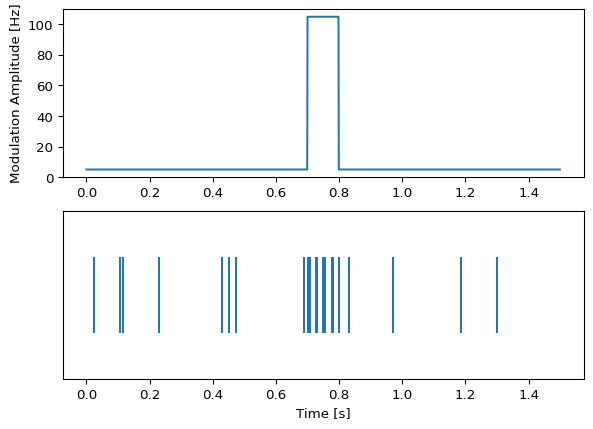

<span class="theorem-title">**Exercise 1**</span> Use
`utils.pulse_NonStationaryPoissonProcess()` to simulate a neuron that is
active for **3s** with a base firing-rate of **10 Hz** that is modulated
by a pulse which starts at of **1 s**, lasts **0.25 s** and has an
amplitude of **50 Hz**. Then, plot the neuron’s `.rate_signal`.

``` python
neuron = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=50 * pq.Hz,
    base_rate= 10* pq.Hz,
    t_stop=3 * pq.s,
)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.xlabel("Time [s]")
plt.ylabel("Modulation Amplitude [Hz]")
```

    Text(0, 0.5, 'Modulation Amplitude [Hz]')

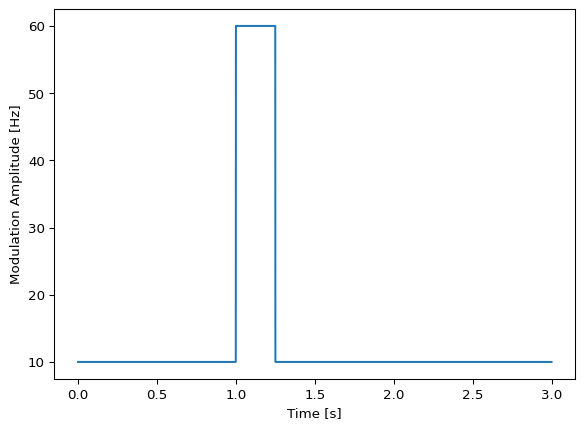

<span class="theorem-title">**Exercise 2**</span> Generate a spike train
from the simulated neuron from
<a href="#exr-sim1" class="quarto-xref">Exercise 1</a> and plot the
neuron’s rate signal together with an `eventplot` of the spike `.times`.
Ensure that the subplots apply the same scaling on the x-axis by using
the `sharex` argument in `plt.subplot()`.

``` python
st = neuron.generate_spiketrain()
ax1 = plt.subplot(2, 1, 1)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.ylabel("Modulation Amplitude [Hz]")
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.eventplot(st.times)
plt.xlabel("Time [s]")
plt.yticks([])
```

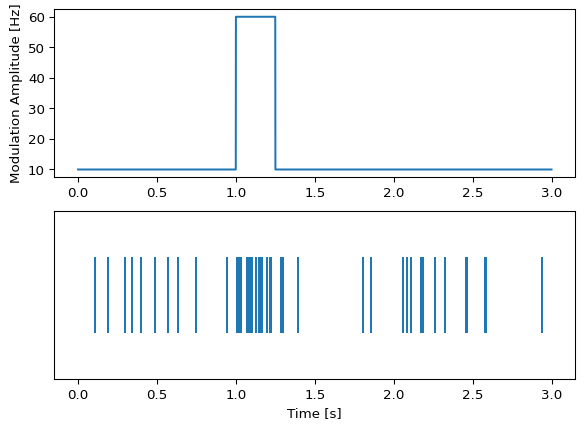

<span class="theorem-title">**Exercise 3**</span> Use
`utils.pulse_NonStationaryPoissonProcess()` to simulate a neuron that is
active for **3s** with a base firing-rate of **0 Hz** that is modulated
by a pulse which starts at of **1 s**, lasts **0.5 s** and has an
amplitude of **20 Hz**. Then, plot the neuron’s `.rate_signal`.

``` python
neuron = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1 * pq.s,
    modulation_duration=0.5 * pq.s,
    modulation_amplitude=20 * pq.Hz,
    base_rate= 0* pq.Hz,
    t_stop=3 * pq.s,
)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.xlabel("Time [s]")
plt.ylabel("Modulation Amplitude [Hz]")
```

    Text(0, 0.5, 'Modulation Amplitude [Hz]')

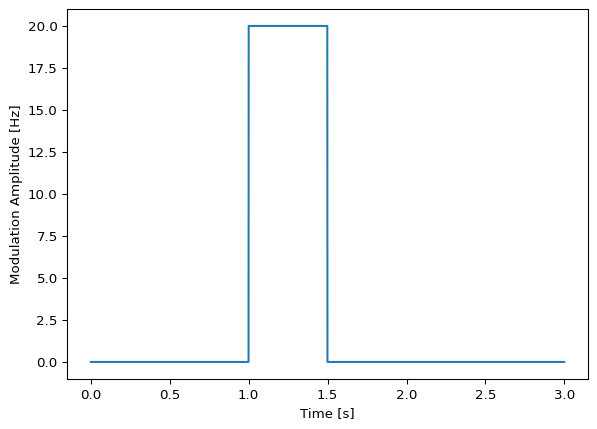

<span class="theorem-title">**Exercise 4**</span> Generate a spike train
from the simulated from
<a href="#exr-sim2" class="quarto-xref">Exercise 3</a> and plot the
neuron’s rate signal together with an `eventplot` of the spike `.times`.
Ensure that the subplots apply the same scaling on the x-axis by using
the `sharex` argument in `plt.subplot()`.

``` python
st = neuron.generate_spiketrain()
ax1 = plt.subplot(2, 1, 1)
plt.plot(neuron.rate_signal.times, neuron.rate_signal)
plt.ylabel("Modulation Amplitude [Hz]")
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.eventplot(st.times)
plt.xlabel("Time [s]")
plt.yticks([])
```

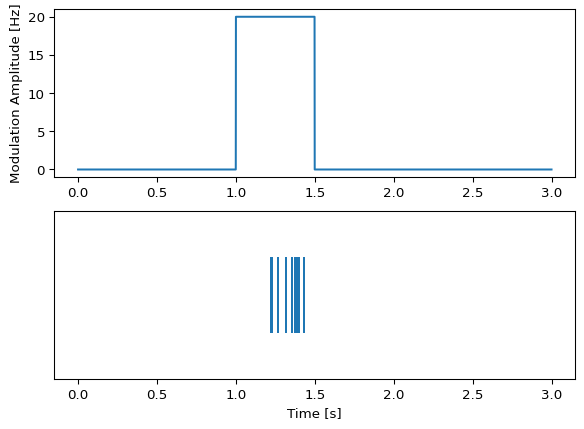

## 2 Binning Spike Trains

| Code | Description |
|------------------------------------|------------------------------------|
| `bst = BinnedSpikeTrain(st, bin_size)` | Convert the spike train `st` to a `BinnedSpiketrain` with a given `bin_size` |
| `bst.bin_centers` | Access the time points at which the bins are centered |
| `bst.to_array()` | Convert the bin counts in `bst` to a numy array |
| `bst = bst.binarize()` | Convert the binned spike train to a binary representation |

------------------------------------------------------------------------

<span class="theorem-title">**Example 3**</span> Create a
`BinnedSpikeTrain` from the spike train `st` with a `bin_size` of **20
ms**. Then plot the spike train `st` together with the binned spike
train `bst`.

``` python
bst = BinnedSpikeTrain(st, bin_size=20 * pq.ms)
ax1 = plt.subplot(2, 1, 1)
plt.eventplot(st.times)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(bst.bin_centers, bst.to_array().flatten())
```

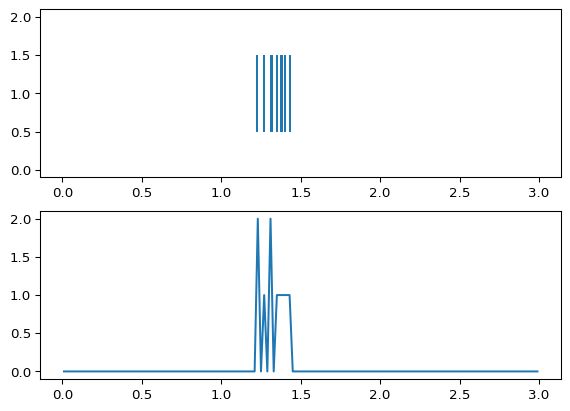

<span class="theorem-title">**Exercise 5**</span> Create a
`BinnedSpikeTrain` from the spike train `st` with a `bin_size` of **80
ms**. Then plot the spike train `st` together with the binned spike
train `bst`.

``` python
bst = BinnedSpikeTrain(st, bin_size=80 * pq.ms)
ax1 = plt.subplot(2, 1, 1)
plt.eventplot(st.times)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(bst.bin_centers, bst.to_array().flatten())
```

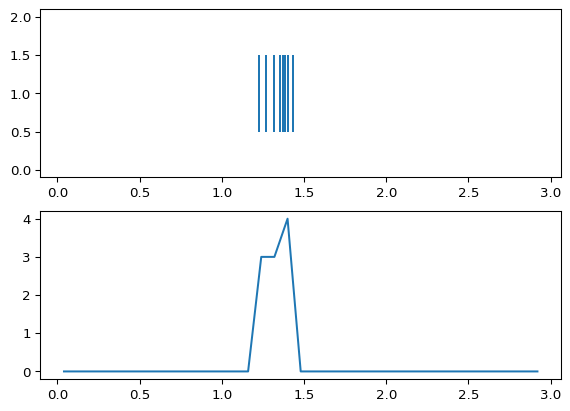

<span class="theorem-title">**Exercise 6**</span> Create a
`BinnedSpikeTrain` from the spike train `st` with a `bin_size` of **5
ms**. Then plot the spike train `st` together with the binned spike
train `bst`.

``` python
bst = BinnedSpikeTrain(st, bin_size=5 * pq.ms)
ax1 = plt.subplot(2, 1, 1)
plt.eventplot(st.times)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(bst.bin_centers, bst.to_array().flatten())
```

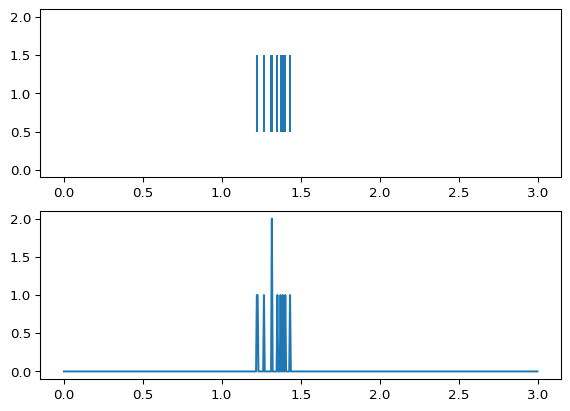

<span class="theorem-title">**Exercise 7**</span> Create a
`BinnedSpikeTrain` from the spike train `st` with a `bin_size` of **5
ms**. Then call `bst.binarize()` to make the binned spike train
**binary** and plot t together with the spike train `st`. o

``` python
bst = BinnedSpikeTrain(st, bin_size=5 * pq.ms)
bst = bst.binarize()
ax1 = plt.subplot(2, 1, 1)
plt.eventplot(st.times)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(bst.bin_centers, bst.to_array().flatten())
```

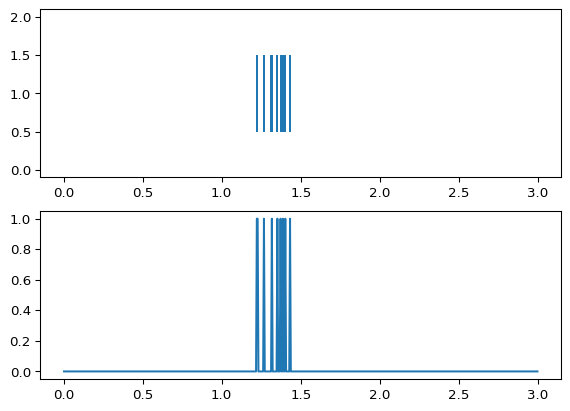

<span class="theorem-title">**Exercise 8**</span> Create a
`BinnedSpikeTrain` from the spike train `st` with a `bin_size` of **80
ms**. Then call `bst.binarize()` to make the binned spike train
**binary** and plot t together with the spike train `st`. o

``` python
bst = BinnedSpikeTrain(st, bin_size=80 * pq.ms)
bst = bst.binarize()
ax1 = plt.subplot(2, 1, 1)
plt.eventplot(st.times)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(bst.bin_centers, bst.to_array().flatten())
```

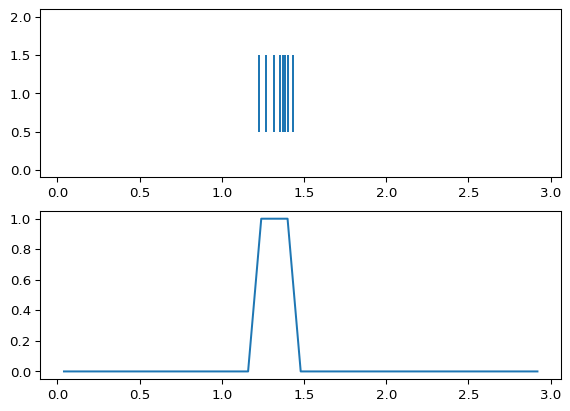

## 3 Spike Train Covariance and Correlation

| Code | Description |
|------------------------------------|------------------------------------|
| `cov = covariance(bsts)` | Compute the pairwise covariances for the binned spike trains in `bsts` |
| `r = correlation(bsts)` | Compute the pairwise (Pearson’s) correlation for the binned spike trains in `bsts` |
| `img = plt.imshow(cov)` | Plot the covariance matrix `cov` as an image and assign the returned object to a variable `img` |
| `plt.colorbar(img)` | Add a colorbar to the image `img` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 4**</span> Simualte a Poisson
neuron with a rate of **1 Hz** that is active for **10 s**. Then.
generate **50** spike trains from that neuron and convert them to a
binned spke train with a `bin_size` of **5 ms**.

``` python
neuron = StationaryPoissonProcess(rate=1 * pq.Hz, t_stop=10 * pq.s)
sts = neuron.generate_n_spiketrains(50)
bsts = BinnedSpikeTrain(sts, bin_size=5 * pq.ms)
```

<span class="theorem-title">**Example 5**</span> Compute the
`covariance` for all pairs of binned spike trains in the list `bsts`.
Then, plot the covariance matrix using `plt.imshow()` and add a
`plt.colorbar()`.

``` python
cov = covariance(bsts)
img = plt.imshow(cov)
plt.colorbar(img)
```

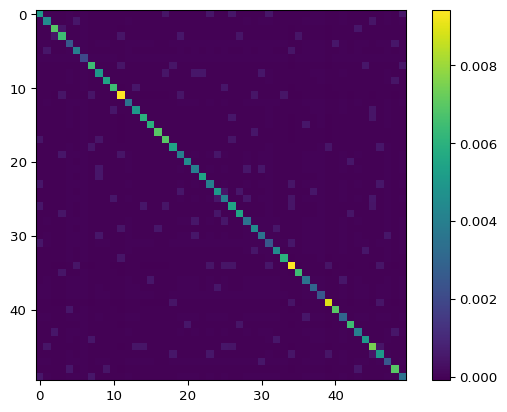

<span class="theorem-title">**Exercise 9**</span> Instead of the
pairwise covariances shown in
<a href="#exm-cov" class="quarto-xref">Example 5</a>, compute and plot
the `correlation_coefficient()` for all pairs of binned spike trains in
the list `bsts`. How does the matrix of correlation coefficients differ
from the covariance matrix?

``` python
r = correlation_coefficient(bsts)
img = plt.imshow(r)
plt.colorbar(img)
```

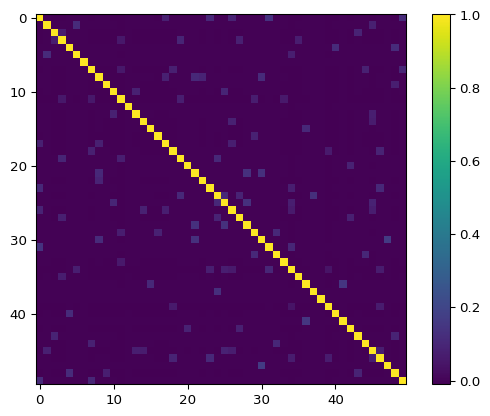

<span class="theorem-title">**Exercise 10**</span> The code below
simulates a brusting neuron, generates **50** spike trains from this
neuron and converts them to a `BinnedSpiketrain` with a `bin_size` of
**5ms**. Compute and plot the correlation matrix for this neuron.

``` python
neuron = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=20 * pq.Hz,
    base_rate=1 * pq.Hz,
    t_stop=3 * pq.s,
)
sts = neuron.generate_n_spiketrains(50)
bsts = BinnedSpikeTrain(sts, bin_size=5 * pq.ms)
```

``` python
r = correlation_coefficient(bsts)
img = plt.imshow(r)
plt.colorbar(img)
```

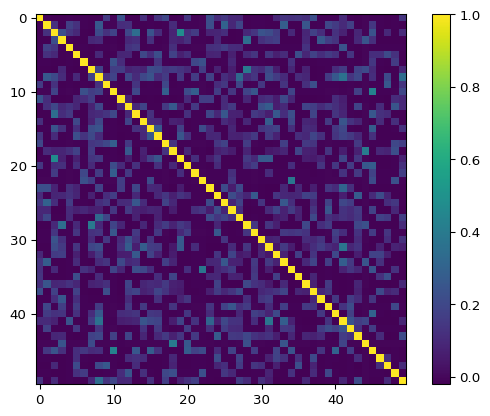

<span class="theorem-title">**Exercise 11**</span> How does increasing
the `modulation_amplitude` (e.g. to **50 Hz** or **100 Hz**) in
<a href="#exr-corr" class="quarto-xref">Exercise 10</a> affect the
correlation of the spike trains?

``` python
for amp in [50, 100, 150]:
    neuron = utils.pulse_NonStationaryPoissonProcess(
        modulation_start=1 * pq.s,
        modulation_duration=0.25 * pq.s,
        modulation_amplitude=amp * pq.Hz,
        base_rate=1 * pq.Hz,
        t_stop=3 * pq.s,
    )
    sts = neuron.generate_n_spiketrains(50)
    bsts = BinnedSpikeTrain(sts, bin_size=5 * pq.ms)
    plt.figure()
    r = correlation_coefficient(bsts)
    img = plt.imshow(r)
    plt.colorbar(img)
```

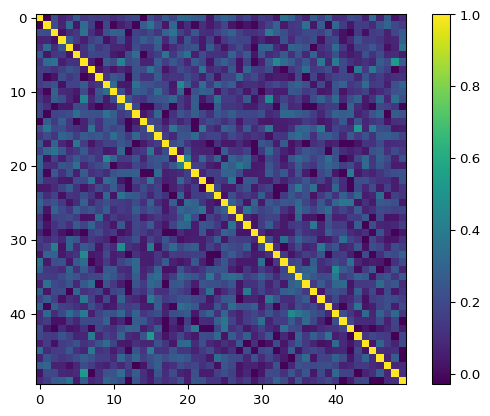

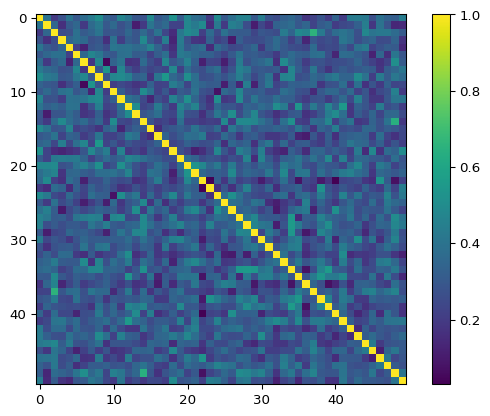

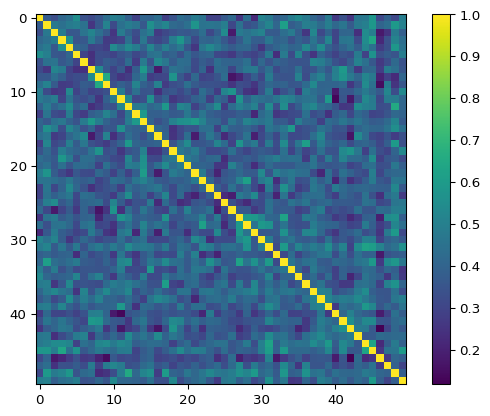

<span class="theorem-title">**Exercise 12**</span> What is the effect of
reducing or increasing the `bin_size` for creating the
`BinnedSpikeTrain` in
<a href="#exr-corr" class="quarto-xref">Exercise 10</a>

``` python
for bs in [1, 50]:
    neuron = utils.pulse_NonStationaryPoissonProcess(
        modulation_start=1 * pq.s,
        modulation_duration=0.25 * pq.s,
        modulation_amplitude=10 * pq.Hz,
        base_rate=1 * pq.Hz,
        t_stop=3 * pq.s,
    )
    sts = neuron.generate_n_spiketrains(50)
    bsts = BinnedSpikeTrain(sts, bin_size=bs * pq.ms)
    plt.figure()
    r = correlation_coefficient(bsts)
    img = plt.imshow(r)
    plt.colorbar(img)
```

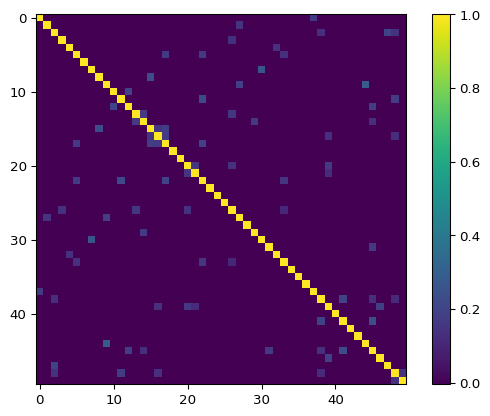

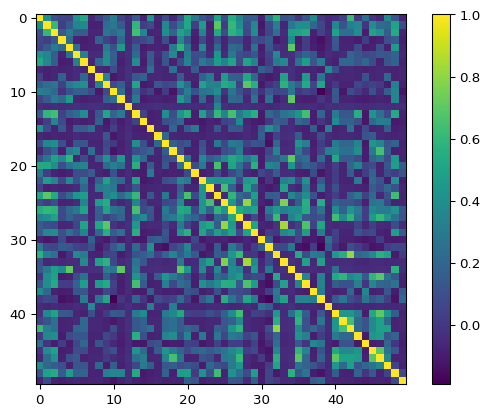

<span class="theorem-title">**Exercise 13**</span> The code below
simulates two neurons `i` and `j` that have the same parameters except
for their `modulation_start`. Run the cell to plot the `.rate_signal`
and generate **25** binned spike trains from each neuron. Based on the
rate signals, what would you expect the correlation matrix to look like?

``` python
neuron_i = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=50 * pq.Hz,
    base_rate=1 * pq.Hz,
    t_stop=3 * pq.s,
)
neuron_j = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1.5 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=50 * pq.Hz,
    base_rate=1 * pq.Hz,
    t_stop=3 * pq.s,
)
plt.plot(neuron_i.rate_signal.times, neuron_i.rate_signal, label="i")
plt.plot(neuron_j.rate_signal.times, neuron_j.rate_signal, label="j")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Modulation Rate [Hz]")
sts = neuron_j.generate_n_spiketrains(25) + neuron_i.generate_n_spiketrains(25)
bsts = BinnedSpikeTrain(sts, bin_size=10 * pq.ms)
```

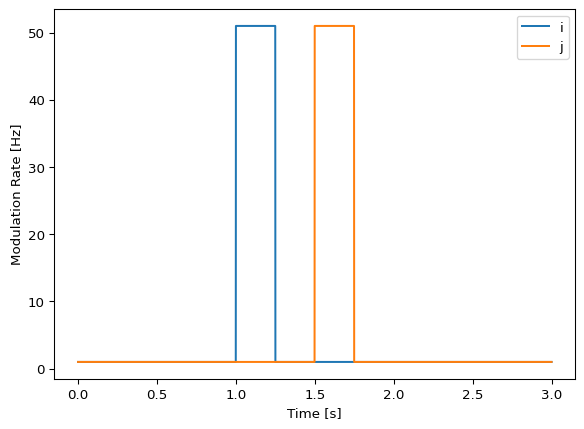

``` python
r = correlation_coefficient(bsts)
img = plt.imshow(r)
plt.colorbar(img)
```

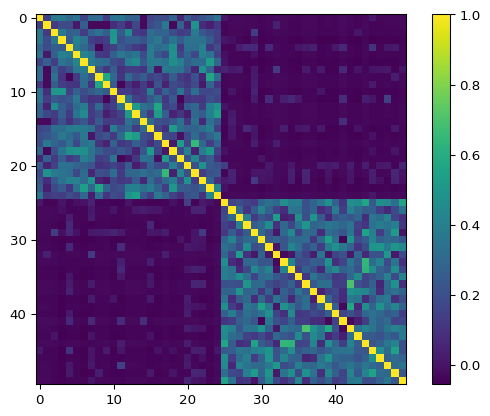

<span class="theorem-title">**Exercise 14**</span> Increase the
`modulation_rate` of `neuron_j` in
<a href="#exr-corr2" class="quarto-xref">Exercise 13</a> to **200 Hz**
and plot the correlation matrix again.

``` python
neuron_i = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=50 * pq.Hz,
    base_rate=1 * pq.Hz,
    t_stop=3 * pq.s,
)
neuron_j = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=1.5 * pq.s,
    modulation_duration=0.25 * pq.s,
    modulation_amplitude=200 * pq.Hz,
    base_rate=1 * pq.Hz,
    t_stop=3 * pq.s,
)
sts = neuron_j.generate_n_spiketrains(25) + neuron_i.generate_n_spiketrains(25)
bsts = BinnedSpikeTrain(sts, bin_size=10 * pq.ms)

r = correlation_coefficient(bsts)
img = plt.imshow(r)
plt.colorbar(img)
```

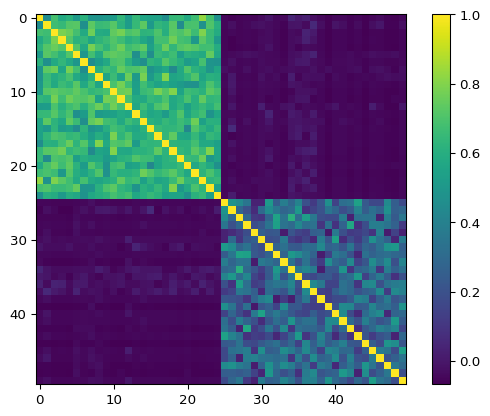

## 4 Cross-Correlation Histrogram

| Code | Description |
|------------------------------------|------------------------------------|
| `cc_hist = cross_correlation_histogram(bst_i, bst_j)` | Compute the cross-correlation histogram for two binned spike trains `bst_i` and `bst_j` |
| `plot_cross_correlation_histogram(cc_hist)` | Plot the cross-correlation histogram `cc_hist` |
| `kernel = np.hamming(5)` | Create a Hamming window of length `3` |
| `cc_hist = cross_correlation_histogram(bst_i, bst_j, kernel=kernel)` | Smooth the cross-correlation histogram by applying a `kernel` |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 15**</span> The code below
computes and plots the `cross_correlation_histogram()` for two binned
spike trains from the neurons `i` and `j` that were simulated in
<a href="#exr-corr2" class="quarto-xref">Exercise 13</a>. Try to infer,
from the plot, the time lag where the cross-correlation histogram peaks.
How is this related to the `modulation_start` of the simulated neurons?

``` python
bst_i = BinnedSpikeTrain(neuron_i.generate_spiketrain(), bin_size=5*pq.ms)
bst_j = BinnedSpikeTrain(neuron_j.generate_spiketrain(), bin_size=5*pq.ms)
cc_hist = cross_correlation_histogram(bst_i, bst_j)
plot_cross_correlation_histogram(cc_hist[0])
```

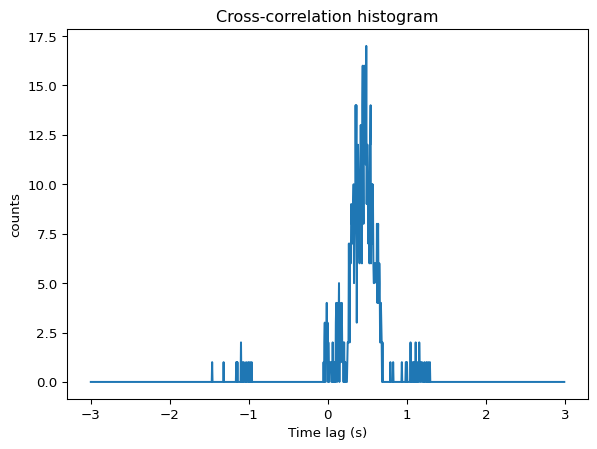

<span class="theorem-title">**Exercise 16**</span> Repeat the code from
<a href="#exr-cc" class="quarto-xref">Exercise 15</a> but change the
order of `bst_i` and `bst_j` when computing the cross-correlation
histogram. How did this affect the timing of the cross-correlation?

``` python
cc_hist = cross_correlation_histogram(bst_i, bst_i)
plot_cross_correlation_histogram(cc_hist[0])
```

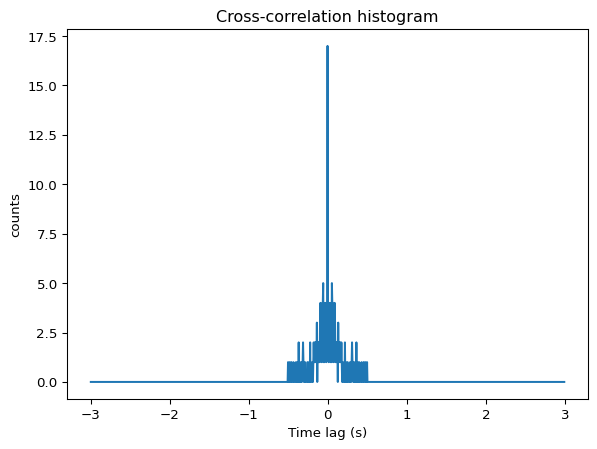

<span class="theorem-title">**Exercise 17**</span> Where would you
expect a peak in the cross-correlation histogram of the binned spike
trains `i` and `j`, simulated below?

``` python
neuron_i = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=0.4 * pq.s,
    modulation_duration=0.05 * pq.s,
    modulation_amplitude=300 * pq.Hz,
    base_rate=10 * pq.Hz,
    t_stop=0.5 * pq.s,
)
neuron_j = utils.pulse_NonStationaryPoissonProcess(
    modulation_start=0.3 * pq.s,
    modulation_duration=0.05 * pq.s,
    modulation_amplitude=300 * pq.Hz,
    base_rate=10 * pq.Hz,
    t_stop=0.5 * pq.s,
)
bst_i = BinnedSpikeTrain(neuron_i.generate_spiketrain(), bin_size=5*pq.ms)
bst_j = BinnedSpikeTrain(neuron_j.generate_spiketrain(), bin_size=5*pq.ms)
```

``` python
cc_hist = cross_correlation_histogram(bst_i, bst_j)
plot_cross_correlation_histogram(cc_hist[0])
```

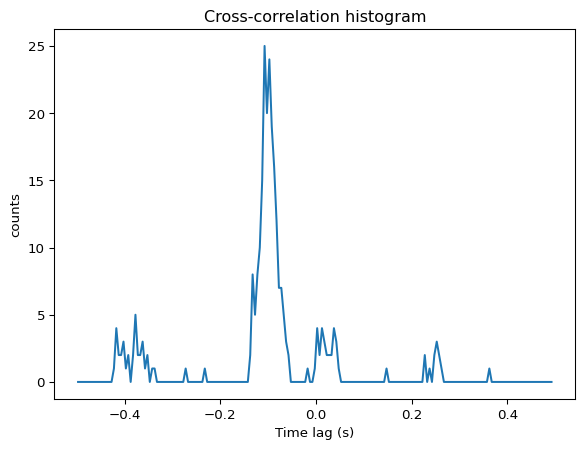

<span class="theorem-title">**Exercise 18**</span> Create a kernel of
length **5** using the `np.hamming()` function, pass it to the
`cross_correlation_histogram` function and plot the resulting
cross-correlation histogram. Then, increase the size of the kernel to
**15** and **30**, respectively.

``` python
for n in [5, 15, 30]:
    kernel = np.hamming(n)
    cc_hist = cross_correlation_histogram(bst_i, bst_j, kernel=kernel)
    plt.figure()
    plot_cross_correlation_histogram(cc_hist[0])
```

    <Figure size 672x480 with 0 Axes>

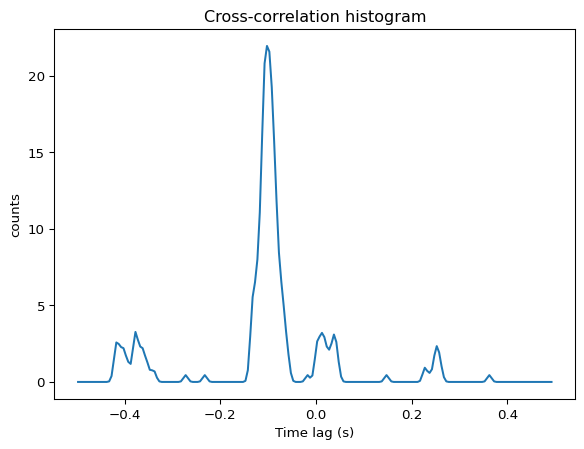

    <Figure size 672x480 with 0 Axes>

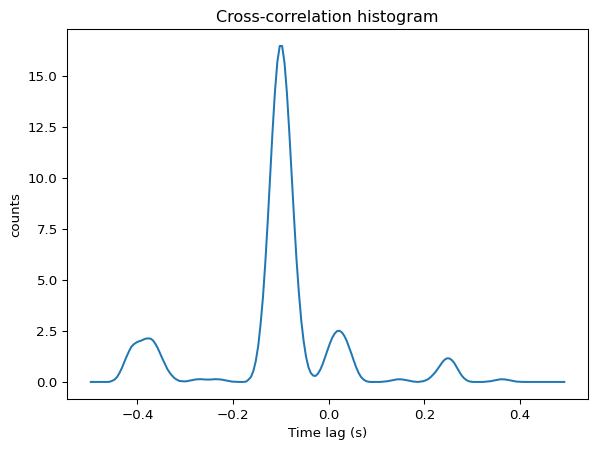

    <Figure size 672x480 with 0 Axes>

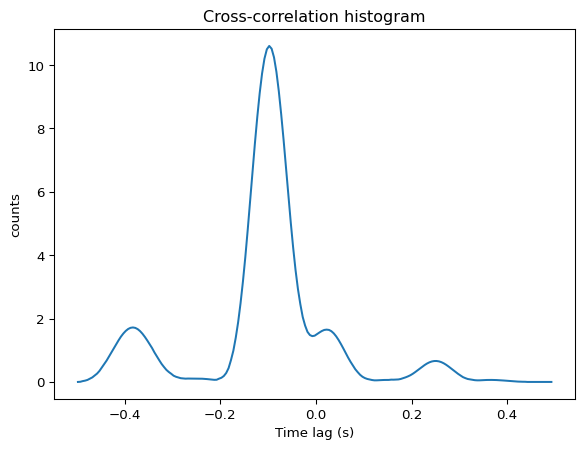

<span class="theorem-title">**Exercise 19**</span> Compute and plot the
cross-correlation histogram of the spike train `bst` simulated below,
**with itself** (i.e. the auti-correlation histogram) and zoom in on the
x-axis (e.g. `plt.xlim(-0.1, 0.1)`). Then increase the
`refractory_period` (e.g. to **10 ms** or **20 ms**) and repeat the
code.

``` python
neuron = StationaryPoissonProcess(
    rate=30 * pq.Hz, t_stop=10 * pq.s, refractory_period=20 * pq.ms
)
st = neuron.generate_spiketrain()
bst = BinnedSpikeTrain(st, bin_size=1 * pq.ms)
```

``` python
cc_hist = cross_correlation_histogram(bst, bst)
plot_cross_correlation_histogram(cc_hist[0])
plt.xlim(-0.1, 0.1)
```

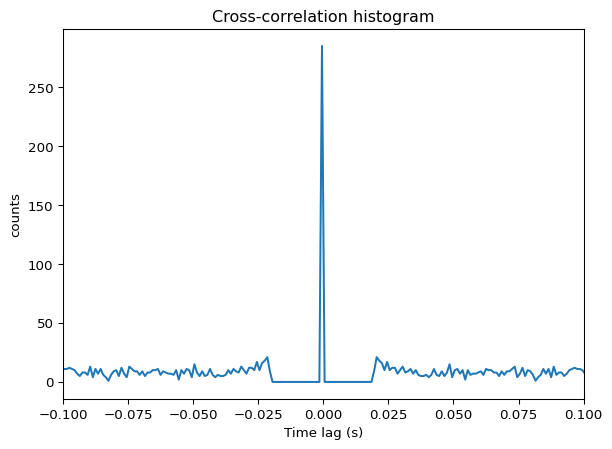